# YOLO PROJECT
## Objetivo do Projeto
Detectar objetos em imagens usando o modelo pré-treinado YOLOv5, que é uma das versões mais populares.

## Preparar o Ambiente
### Explicação:

- Clonamos o repositório oficial do YOLOv5.

- Entramos na pasta do projeto.

- Instalamos todas as dependências necessárias.



In [1]:
# Instalando o YOLOv5 direto do repositório oficial do ultralytics
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


C:\Users\Matheus\Documents\Github Projects\research_MLs\projects\YOLO\yolov5


Cloning into 'yolov5'...


  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 12.0 MB/s eta 0:00:00

  Attempting uninstall: sympy

   ---- ----------------------------------- 1/9 [sympy]
    Found existing installation: sympy 1.14.0
   ---- ----------------------------------- 1/9 [sympy]
   ---- ----------------------------------- 1/9 [sympy]
   ---- ----------------------------------- 1/9 [sympy]
   ---- ----------------------------------- 1/9 [sympy]
   ---- ----------------------------------- 1/9 [sympy]
   ---- ----------------------------------- 1/9 [sympy]
    Uninstalling sympy-1.14.0:
   ---- ----------------------------------- 1/9 [sympy]
   ---- ----------------------------------- 1/9 [sympy]
   ---- ----------------------------------- 1/9 [sympy]
   ---- ----------------------------------- 1/9 [sympy]
   ---- -------

## Carregar o Modelo YOLOv5 Pré-Treinado
### Explicação:

- Usamos o PyTorch Hub para carregar o modelo pré-treinado yolov5s.

- Essa versão detecta 80 classes (pessoas, carros, animais, etc.) da base COCO.



In [2]:
import torch

# Carregar o modelo YOLOv5s (versão básica, starter)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)


C:\Users\Matheus\Documents\Github Projects\research_MLs\ml_env\Lib\site-packages\torch\hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Matheus/.cache\torch\hub\master.zip


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Matheus\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5  2025-5-10 Python-3.13.0 torch-2.6.0+cpu CPU

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14.1M/14.1M [00:01<00:00, 10.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Fazer Detecção em Uma Imagem
- Usamos uma imagem famosa usada em testes do YOLO.

- O modelo detecta objetos e desenha as "caixas delimitadoras" automaticamente.

C:\Users\Matheus/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


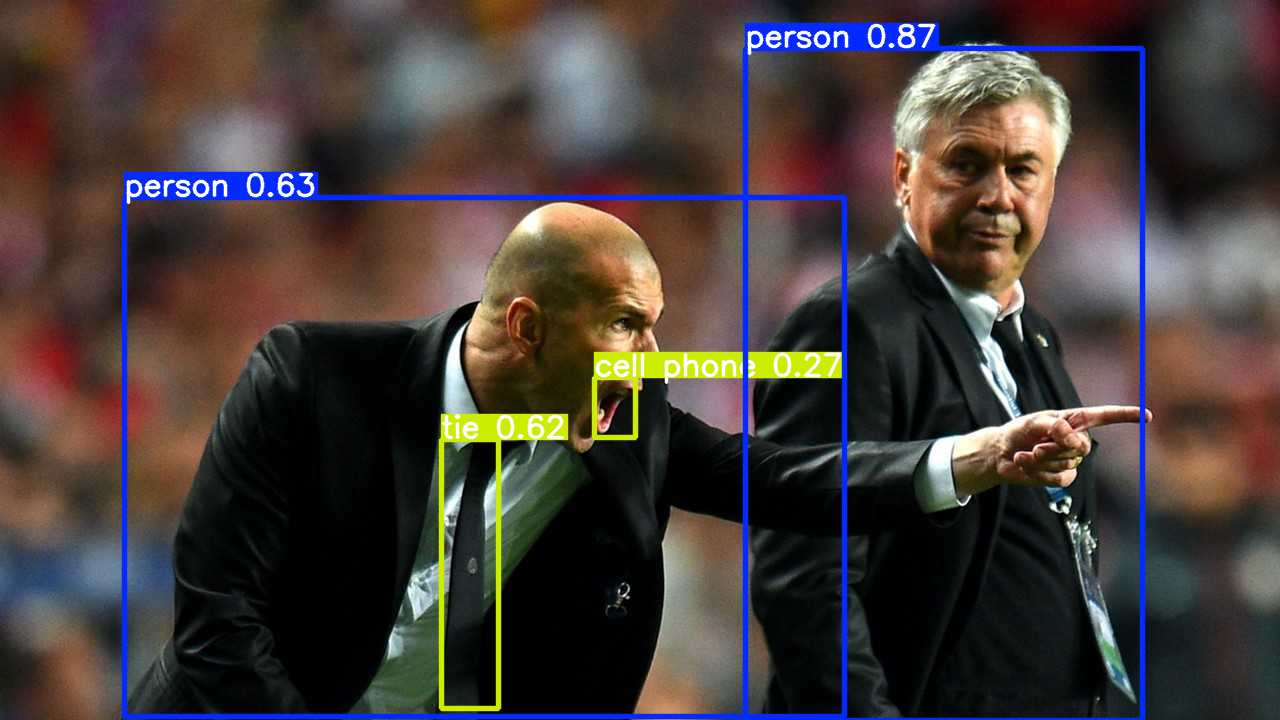

In [7]:
from PIL import Image
import requests
from io import BytesIO

# Baixar uma imagem da internet para testar
url = 'https://ultralytics.com/images/zidane.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Exibir a imagem original
img.show()

# Rodar a detecção
results = model(img)

# Mostrar os resultados com bounding boxes
results.show()


In [4]:
# Mostrar os resultados em formato de tabela
results.pandas().xyxy[0]

xmin        ymin         xmax        ymax  confidence  class  \
0  745.578674   48.470337  1142.694336  720.000000    0.868910      0   
1  124.744110  197.334534   844.397339  716.650574    0.630327      0   
2  441.238708  439.350677   498.380737  708.570923    0.616793     27   
3  594.081787  377.300385   635.423950  437.147797    0.274013     67   

         name  
0      person  
1      person  
2         tie  
3  cell phone

## Usando Imagem Local

<>:4: SyntaxWarning: invalid escape sequence '\M'
<>:4: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Matheus\AppData\Local\Temp\ipykernel_3964\1914924564.py:4: SyntaxWarning: invalid escape sequence '\M'
  img_path = '..\MatheusRPG.jpeg'  # troque pelo caminho da sua imagem
C:\Users\Matheus/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


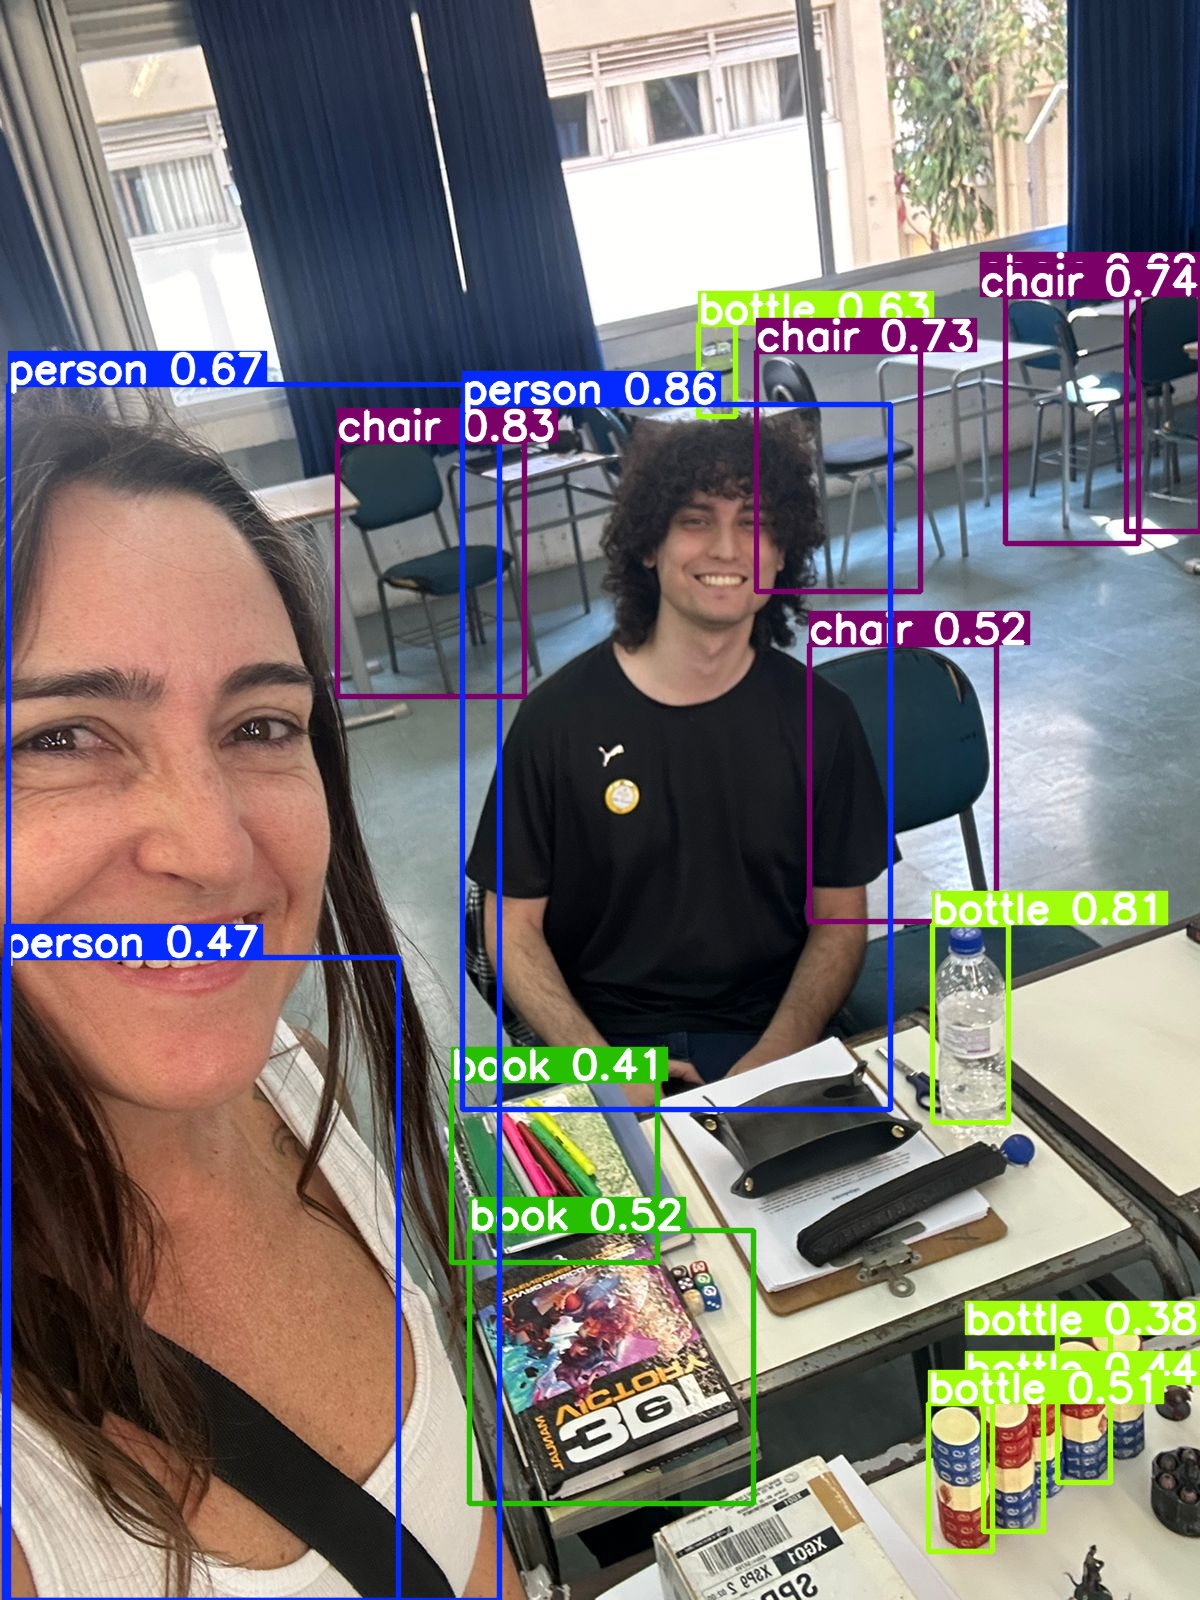

In [14]:
# Se quiser usar uma imagem do seu computador:
from IPython.display import Image as IPyImage

img_path = '..\MatheusRPG.jpeg'  # troque pelo caminho da sua imagem
results = model(img_path)
results.show()


In [15]:
# Mostrar os resultados em formato de tabela
results.pandas().xyxy[0]

xmin         ymin         xmax         ymax  confidence  class  \
0    462.788361   404.420197   890.088806  1109.936035    0.863189      0   
1    337.348358   441.323090   524.255493   696.783447    0.828116     56   
2    932.177856   924.239319  1008.452759  1122.927856    0.814593     39   
3   1005.024414   296.257660  1138.684326   543.796265    0.736007     56   
4    756.838928   351.657104   920.496887   591.116089    0.731456     56   
5      8.117523   384.100403   499.149384  1600.000000    0.668086      0   
6    698.463745   324.584839   735.702332   416.696594    0.632281     39   
7   1126.454712   285.269714  1200.000000   531.011353    0.616593     56   
8    469.825897  1230.323730   753.780334  1503.632202    0.524366     73   
9    809.263367   644.097412   996.671204   921.722412    0.522519     56   
10   928.362366  1403.008667   992.823547  1551.682983    0.507497     39   
11     4.571590   957.809875   398.645782  1600.000000    0.473578      0   
12   983.351685  1384.263916  1043.032837  1531.308228    0.436887     39   
13   451.153229  1080.480713   657.504578  1262.604370    0.414885     73   
14  1057.198486  1334.527222  1110.860718  1482.366943    0.376841     39   

      name  
0   person  
1    chair  
2   bottle  
3    chair  
4    chair  
5   person  
6   bottle  
7    chair  
8     book  
9    chair  
10  bottle  
11  person  
12  bottle  
13    book  
14  bottle

## Tranformando em objetos:

In [17]:
df = results.pandas().xyxy[0]
df.head()

xmin        ymin         xmax         ymax  confidence  class  \
0   462.788361  404.420197   890.088806  1109.936035    0.863189      0   
1   337.348358  441.323090   524.255493   696.783447    0.828116     56   
2   932.177856  924.239319  1008.452759  1122.927856    0.814593     39   
3  1005.024414  296.257660  1138.684326   543.796265    0.736007     56   
4   756.838928  351.657104   920.496887   591.116089    0.731456     56   

     name  
0  person  
1   chair  
2  bottle  
3   chair  
4   chair

In [18]:
class DetectedObject:
    def __init__(self, name, confidence, bbox):
        self.name = name
        self.confidence = confidence
        self.bbox = bbox  # [xmin, ymin, xmax, ymax]
        
    def __repr__(self):
        return f"{self.name} ({self.confidence:.2f}) - bbox: {self.bbox}"

In [19]:
# Lista de objetos detectados
detected_objects = []

for _, row in df.iterrows():
    name = row['name']
    confidence = row['confidence']
    bbox = [row['xmin'], row['ymin'], row['xmax'], row['ymax']]
    
    obj = DetectedObject(name, confidence, bbox)
    detected_objects.append(obj)

# Exibir os objetos detectados
for obj in detected_objects:
    print(obj)

person (0.86) - bbox: [462.7883605957031, 404.4201965332031, 890.0888061523438, 1109.93603515625]
chair (0.83) - bbox: [337.3483581542969, 441.3230895996094, 524.2554931640625, 696.783447265625]
bottle (0.81) - bbox: [932.1778564453125, 924.2393188476562, 1008.4527587890625, 1122.9278564453125]
chair (0.74) - bbox: [1005.0244140625, 296.2576599121094, 1138.684326171875, 543.7962646484375]
chair (0.73) - bbox: [756.8389282226562, 351.6571044921875, 920.4968872070312, 591.1160888671875]
person (0.67) - bbox: [8.117523193359375, 384.10040283203125, 499.1493835449219, 1600.0]
bottle (0.63) - bbox: [698.4637451171875, 324.5848388671875, 735.7023315429688, 416.69659423828125]
chair (0.62) - bbox: [1126.4547119140625, 285.26971435546875, 1200.0, 531.0113525390625]
book (0.52) - bbox: [469.8258972167969, 1230.32373046875, 753.7803344726562, 1503.6322021484375]
chair (0.52) - bbox: [809.2633666992188, 644.097412109375, 996.6712036132812, 921.722412109375]
bottle (0.51) - bbox: [928.362365722656

In [20]:
# Contagem de objetos por classe
df['name'].value_counts()


name
chair     5
bottle    5
person    3
book      2
Name: count, dtype: int64